In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [2]:
hdb_string = "HDBdata with district_coord_dist_full_corrected2.csv"
df = pd.read_csv(hdb_string, na_values=0)

# EDA

In [3]:
df.head()

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist
0,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640,858.575938
1,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238,1370.233958
2,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425,896.538505
3,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175,942.352562
4,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076,856.601041


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
District,113959.0,18.847498,6.281778,1.000000,18.000000,19.000000,23.000000,2.800000e+01
District.1,113959.0,18.818084,6.328647,1.000000,18.000000,19.000000,23.000000,2.800000e+01
floor_area_sqm,113959.0,97.859061,24.147210,31.000000,82.000000,95.000000,113.000000,2.490000e+02
lease_commence_date,113959.0,1995.010477,13.395018,1966.000000,1985.000000,1995.000000,2005.000000,2.019000e+03
remaining_lease,113959.0,74.892075,13.288946,44.000000,64.000000,75.000000,85.000000,9.800000e+01
resale_price,113959.0,457961.507288,158521.858641,140000.000000,342000.000000,428000.000000,540000.000000,1.295000e+06
Price/sqm,113959.0,4713.508969,1275.304605,2089.552239,3870.967742,4408.602151,5169.651423,1.290323e+04
Latitude,113959.0,1.367317,0.042705,1.270369,1.336750,1.367785,1.395605,1.459192e+00
Longitude,113959.0,103.842270,0.071347,103.685206,103.780243,103.848998,103.899620,1.039876e+02
mrtdist,113959.0,1130.106043,615.371712,44.416611,636.790261,1038.576697,1565.223916,5.045443e+03


In [5]:
df[df.mrtdist.isna()]

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist


In [6]:
df_dropped = df.dropna(axis=0)

In [7]:
df_dropped.describe().T

,count,mean,std,min,25%,50%,75%,max
District,113959.0,18.847498,6.281778,1.000000,18.000000,19.000000,23.000000,2.800000e+01
District.1,113959.0,18.818084,6.328647,1.000000,18.000000,19.000000,23.000000,2.800000e+01
floor_area_sqm,113959.0,97.859061,24.147210,31.000000,82.000000,95.000000,113.000000,2.490000e+02
lease_commence_date,113959.0,1995.010477,13.395018,1966.000000,1985.000000,1995.000000,2005.000000,2.019000e+03
remaining_lease,113959.0,74.892075,13.288946,44.000000,64.000000,75.000000,85.000000,9.800000e+01
resale_price,113959.0,457961.507288,158521.858641,140000.000000,342000.000000,428000.000000,540000.000000,1.295000e+06
Price/sqm,113959.0,4713.508969,1275.304605,2089.552239,3870.967742,4408.602151,5169.651423,1.290323e+04
Latitude,113959.0,1.367317,0.042705,1.270369,1.336750,1.367785,1.395605,1.459192e+00
Longitude,113959.0,103.842270,0.071347,103.685206,103.780243,103.848998,103.899620,1.039876e+02
mrtdist,113959.0,1130.106043,615.371712,44.416611,636.790261,1038.576697,1565.223916,5.045443e+03


In [8]:
df_dropped.head()

,District,District info,District.1,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Price/sqm,Latitude,Longitude,mrtdist
0,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,5272.727273,1.375748,103.854640,858.575938
1,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,3731.343284,1.369525,103.837238,1370.233958
2,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,3910.447761,1.380760,103.835425,896.538505
3,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,3897.058824,1.366213,103.857175,942.352562
4,20,"AMK, Bishan, Thomson",20,1 01 2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,3955.223881,1.380987,103.835076,856.601041


Right off the bat we notice some outliers when it comes to location coordinates

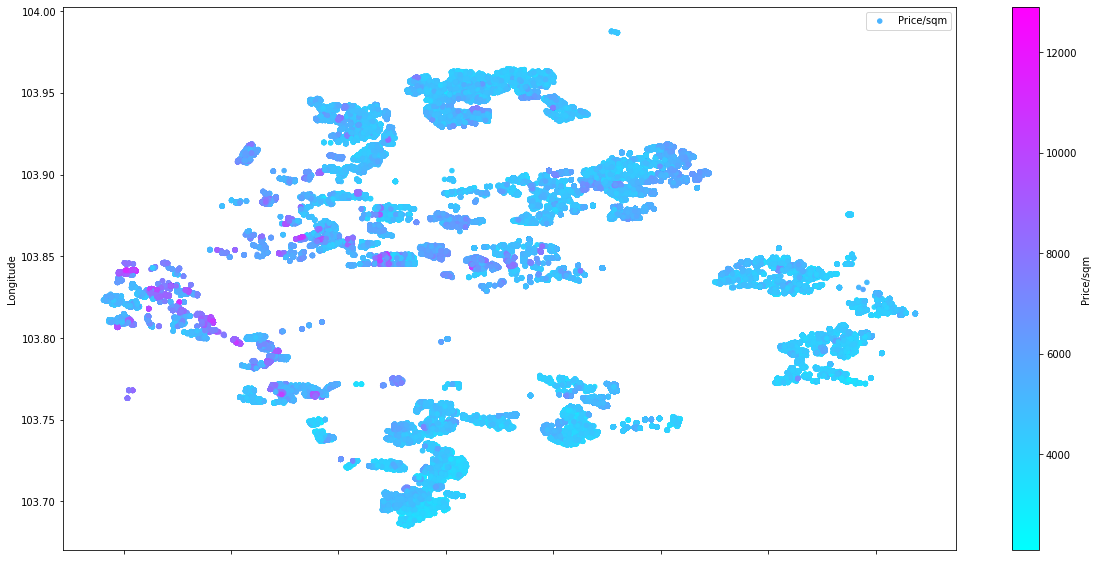

In [9]:
df_dropped.plot(kind='scatter', 
                x = 'Latitude', 
                y= 'Longitude', 
                c ='Price/sqm', 
                label= 'Price/sqm', 
                cmap = 'cool',
                colorbar = True,
                figsize = (20,10))
plt.show()

In [10]:
df_dropped.columns

Index(['District', 'District info', 'District.1', 'month', 'town', 'flat_type',
       'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'remaining_lease', 'resale_price', 'Price/sqm',
       'Latitude', 'Longitude', 'mrtdist'],
      dtype='object')

In [11]:
# Total features dropped are town, lease commence date, block, address and price/sqm

df_dropped.drop(columns=['town','lease_commence_date','Price/sqm','District info','District.1'], inplace = True)
df_dropped.drop(columns=['street_name','block'], inplace = True)

In [12]:
df_dropped.head()

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,Latitude,Longitude,mrtdist
0,20,1 01 2017,2 ROOM,10 TO 12,44.0,Improved,61,232000.0,1.375748,103.854640,858.575938
1,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,60,250000.0,1.369525,103.837238,1370.233958
2,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,262000.0,1.380760,103.835425,896.538505
3,20,1 01 2017,3 ROOM,04 TO 06,68.0,New Generation,62,265000.0,1.366213,103.857175,942.352562
4,20,1 01 2017,3 ROOM,01 TO 03,67.0,New Generation,62,265000.0,1.380987,103.835076,856.601041


In [13]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113959 entries, 0 to 113958
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   District         113959 non-null  int64  
 1   month            113959 non-null  object 
 2   flat_type        113959 non-null  object 
 3   storey_range     113959 non-null  object 
 4   floor_area_sqm   113959 non-null  float64
 5   flat_model       113959 non-null  object 
 6   remaining_lease  113959 non-null  int64  
 7   resale_price     113959 non-null  float64
 8   Latitude         113959 non-null  float64
 9   Longitude        113959 non-null  float64
 10  mrtdist          113959 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 10.4+ MB


# Feature Engineering

In [14]:
## PCA here, DBSCAN

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

polynominal features (degree 2) added in for numerical features below in pipeline

# Modelling

In [15]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

seed_number = 42

In [16]:
y = df_dropped.resale_price
x = df_dropped.loc[:, df_dropped.columns != 'resale_price']

In [17]:
num_cols = x.select_dtypes(['float64','int64']).columns
cat_cols = x.select_dtypes(['object']).columns

In [18]:
df_dropped.shape

(113959, 11)

In [19]:
# Creating training, validation and test sets

X_train, X_temp, y_train, y_temp = train_test_split(x, y ,
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [20]:
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp ,
                                                    test_size = 0.5, 
                                                    shuffle = True,
                                                   random_state = seed_number)

In [21]:
print('Shapes')
print('X_train.shape \t' , X_train.shape)
print('X_val.shape \t' , X_val.shape)
print('X_test.shape \t' , X_test.shape)
print('y_train.shape \t' , y_train.shape)
print('y_val.shape \t' , y_val.shape)
print('y_test.shape \t' , y_test.shape)

Shapes
X_train.shape 	 (91167, 10)
X_val.shape 	 (11396, 10)
X_test.shape 	 (11396, 10)
y_train.shape 	 (91167,)
y_val.shape 	 (11396,)
y_test.shape 	 (11396,)


In [22]:
X_train.head()

,District,month,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,Latitude,Longitude,mrtdist
70882,23,1 06 2020,4 ROOM,10 TO 12,104.0,Model A,62,1.346244,103.749405,310.651595
88389,13,1 01 2021,3 ROOM,10 TO 12,67.0,Model A,94,1.329476,103.889293,637.971127
42714,22,1 01 2019,3 ROOM,04 TO 06,67.0,New Generation,63,1.348451,103.717384,611.786052
66256,16,1 02 2020,3 ROOM,13 TO 15,67.0,New Generation,58,1.334728,103.928924,2110.665998
61448,18,1 11 2019,EXECUTIVE,13 TO 15,146.0,Apartment,73,1.376877,103.945004,638.883253


In [23]:
# Pipeline needs to include the elimination of the column and feature transformation / engineering

In [24]:
# Pipeline

# Scale numerical variables

num_pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('poly', PolynomialFeatures())
])

# One hot encoding categorical variables

cat_pipline = Pipeline([
    ('ohe', OneHotEncoder(drop = 'first'))
])

preprocess = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipline, cat_cols)
])

In [25]:
X_train_preprocessed = preprocess.fit_transform(X_train)

In [26]:
X_val_preprocessed = preprocess.transform(X_val)

In [27]:
X_train_preprocessed.shape

(91167, 127)

In [28]:
X_train_preprocessed[:10]

<10x127 sparse matrix of type '<class 'numpy.float64'>'
	with 320 stored elements in Compressed Sparse Row format>

In [29]:
X_train_preprocessed[0].shape

(1, 127)

In [30]:
X_val_preprocessed.shape

(11396, 127)

# Deep Learning Model

In [31]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [32]:
def R2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [38]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,input_dim = X_train_preprocessed.shape[1],activation = 'relu'),
    tf.keras.layers.Dropout(rate= 0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation = 'relu')
])

In [39]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               65536     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 1024)              1049600   
                                                        

In [40]:
early_callback = tf.keras.callbacks.EarlyStopping(patience=50)

In [41]:
dnn_model.compile(loss = 'mse', 
                  metrics =[tf.metrics.RootMeanSquaredError(),tf.metrics.MeanAbsoluteError(),R2_score],#.,tfa.metrics.RSquare()], 
                  optimizer = tf.keras.optimizers.RMSprop())

In [42]:
# to.array() converts the sparse matrix to numpy array
dnn_model_history = dnn_model.fit(X_train_preprocessed.toarray(), 
                                  np.array(y_train), 
                                  epochs = 250, 
                                  validation_data = [X_val_preprocessed.toarray(), np.array(y_val)], 
                                  batch_size = 32,
                                  callbacks=[early_callback])

Epoch 1/250
2849/2849 [==============================] - 52s 17ms/step - loss: 230073188352.0000 - root_mean_squared_error: 479659.4375 - mean_absolute_error: 453831.1250 - R2_score: -9.2199 - val_loss: 226035515392.0000 - val_root_mean_squared_error: 475431.9062 - val_mean_absolute_error: 449973.8750 - val_R2_score: -8.6079
Epoch 2/250
2849/2849 [==============================] - 49s 17ms/step - loss: 208427958272.0000 - root_mean_squared_error: 456539.0938 - mean_absolute_error: 433812.8125 - R2_score: -8.2176 - val_loss: 193701806080.0000 - val_root_mean_squared_error: 440115.6562 - val_mean_absolute_error: 419263.9375 - val_R2_score: -7.2461
Epoch 3/250
2849/2849 [==============================] - 49s 17ms/step - loss: 170330226688.0000 - root_mean_squared_error: 412710.8125 - mean_absolute_error: 394865.5938 - R2_score: -6.5189 - val_loss: 146852610048.0000 - val_root_mean_squared_error: 383213.5312 - val_mean_absolute_error: 368926.0000 - val_R2_score: -5.2698
Epoch 4/250
2849/28

In [43]:
dnn_model_history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'mean_absolute_error', 'R2_score', 'val_loss', 'val_root_mean_squared_error', 'val_mean_absolute_error', 'val_R2_score'])

In [44]:
def plot_dnn_results(history):
    
    fig , axes = plt.subplots(nrows=2,figsize = (10,10))
    
    rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
        
    axes[0].plot(range(len(rmse)),np.round(rmse,2), 'r-', label = 'Training RMSE')
    axes[0].plot(range(len(rmse)),np.round(val_rmse,2), 'b--', label = 'Validation RMSE')
    axes[0].set_ylabel('RMSE')
    axes[0].set_xlabel('Epochs')
    axes[0].set_title('Training vs Validation RMSE for Full Training Data')
    axes[0].legend()
    plt.show
    
    rmse = history.history['root_mean_squared_error'][-50:]
    val_rmse = history.history['val_root_mean_squared_error'][-50:]
    
    axes[1].plot(range(len(rmse))[-50:],np.round(rmse,2), 'r-', label = 'Training RMSE')
    axes[1].plot(range(len(rmse))[-50:],np.round(val_rmse,2), 'b--', label = 'Validation RMSE')
    axes[1].set_ylabel('RMSE')
    axes[1].set_xlabel('Last Epochs')
    axes[1].set_title('Training vs Validation RMSE for last 50 epochs')
    axes[1].legend()
    plt.show

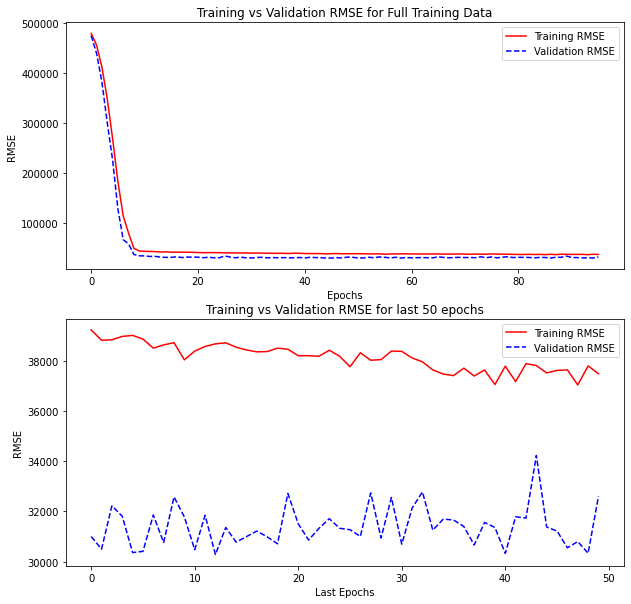

In [45]:
plot_dnn_results(dnn_model_history)

In [46]:
X_test_preprocess = preprocess.transform(X_test)

In [47]:
dnn_model_score = dnn_model.evaluate(X_test_preprocess.toarray(), y_test)

357/357 [==============================] - 2s 4ms/step - loss: 1054804992.0000 - root_mean_squared_error: 32477.7617 - mean_absolute_error: 21569.0566 - R2_score: 0.9534


In [48]:
dnn_model_score

[1054804992.0, 32477.76171875, 21569.056640625, 0.9534403681755066]

In [49]:
print('RMSE of Deep Learning Model :' ,dnn_model_score[1])
print('MAE of Deep Learning Model :' ,dnn_model_score[2])
print('R2 score of Deep Learning Model :' ,dnn_model_score[3])

RMSE of Deep Learning Model : 32477.76171875
MAE of Deep Learning Model : 21569.056640625
R2 score of Deep Learning Model : 0.9534403681755066


In [50]:
X_test.iloc[0]

District                     4
month                1 03 2018
flat_type               5 ROOM
storey_range          04 TO 06
floor_area_sqm           117.0
flat_model            Standard
remaining_lease             56
Latitude              1.276749
Longitude           103.818872
mrtdist            1215.369211
Name: 23132, dtype: object

In [51]:
y_test.iloc[0]

595000.0

In [52]:
dnn_model.predict(X_test_preprocess[0])

array([[563997.3]], dtype=float32)

In [ ]:
mse_train = mean_squared_error(lgb_cv.predict(preprocess.transform(X_train)), y_train)**(1/2)
mse_test = mean_squared_error(lgb_cv.predict(preprocess.transform(X_test)), y_test)**(1/2)

print('mse_train ' , mse_train)
print('mse_test ' , mse_test)

In [ ]:
pickled_model = pickle.load(open('lgm_pkl.pkl', 'rb'))
pickled_model.predict(X_test)

## LSTM